## Comparison of Aharonian and Ghisellini approximations of Synchrotron emissivities

In [5]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import cbrt

In [6]:
# Aharonian emissivity, copied from naima
# reference Aharonian, F.A., Kelner, S.R., & Prosekin, A.Y. 2010, Physical Review D, 82, 043002.
def Gtilde(x):
    """
    AKP10 Eq. D7
    Factor ~2 performance gain in using cbrt(x)**n vs x**(n/3.)
    Invoking crbt only once reduced time by ~40%
    """
    cb = cbrt(x)
    gt1 = 1.808 * cb / np.sqrt(1 + 3.4 * cb**2.)
    gt2 = 1 + 2.210 * cb**2. + 0.347 * cb**4.
    gt3 = 1 + 1.353 * cb**2. + 0.217 * cb**4.
    return gt1 * (gt2 / gt3) * np.exp(-x)

In [15]:
# parametrization with the Bessel functions in Chiaberge and Ghisellini
from scipy.special import kv
def G(t):
    """
    Dimensionless part of Eq. (13) in Chiaberge & Ghisellini (1998) MNRAS, 306,551 (1999)
    """
    _term1 = kv(4/3,t)*kv(1/3,t)
    _term2 = -3/5*t*(kv(4/3,t)**2 - kv(1/3,t)**2)
    return t**2 * (_term1 + _term2)

In Ghisellini's paper the variable $t$ is
$$t = \nu/\nu_c, \quad {\rm where } \quad \nu_c = 3\gamma^3 \nu_B = \frac{3 \gamma^2 e B}{2 \pi m_e c}$$ 
Aharonian's parametrization is carried out with the ratio $E_{\gamma}/E_c$, where
$$E_c = \frac{3 e \hbar B \gamma^2}{2 m_e c} = \frac{h}{2 \pi} \frac{3 \gamma^2 e B}{2 m_e c} = h \frac{\nu_c}{2}$$
therefore the dimensionless $t$ in Ghisellini corresponds  to $2x$ in Aharonian's notation

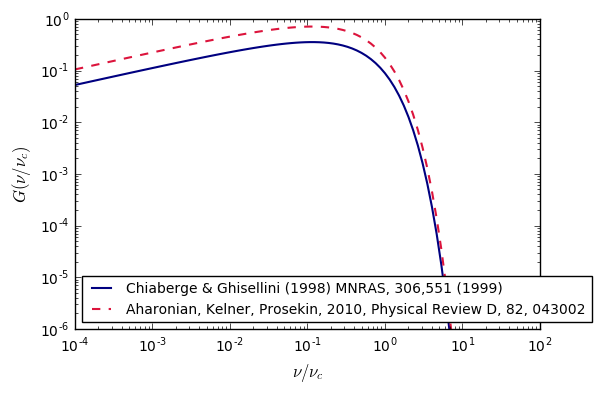

In [16]:
t = np.logspace(-4, 2, 1e2)
plt.loglog(t, G(t), ls='-', lw=1.5, color='navy', label='Chiaberge & Ghisellini (1998) MNRAS, 306,551 (1999)')
plt.loglog(t, Gtilde(2*t), ls='--', lw=1.5, color='crimson', label='Aharonian, Kelner, Prosekin, 2010, Physical Review D, 82, 043002')
plt.xlabel(r'$\nu/\nu_c$', size=12)
plt.ylabel(r'$G(\nu/\nu_c)$', size=12)
plt.legend(loc='lower left', fontsize=10)
plt.ylim([1e-6, 1])
plt.show()